In [ ]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO
#Class, Library, Package 대문자 관례
#지역변수, 파라메타 소문자로 관례
#addr, msg 줄임말 최대한 배제
#두 단어가 합쳐지면 두번째 단어는 대문자
#상수는 전체가 대문자

In [ ]:
subscription_key = '**********************'
face_api_url = 'https://**************.cognitiveservices.azure.com/face/v1.0/detect'

In [ ]:
image_url = 'https://file2.nocutnews.co.kr/newsroom/image/2018/11/03/20181103154544539681_0_750_1050.jpg'


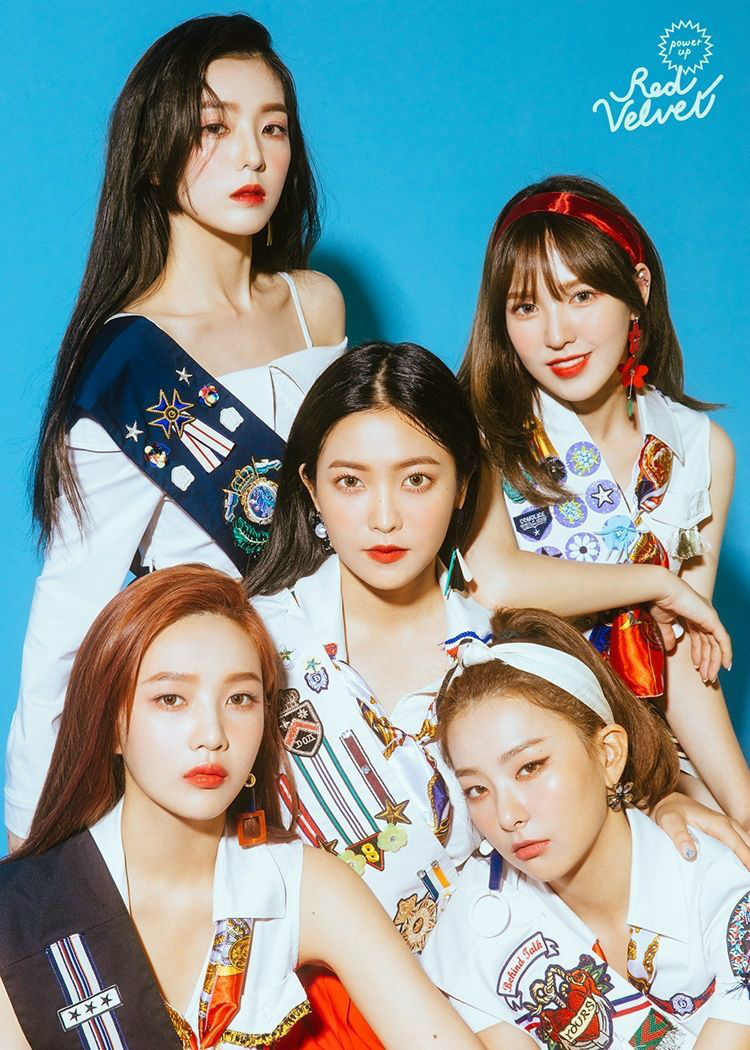

In [ ]:
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [ ]:
headers = {'Ocp-Apim-Subscription-Key' : subscription_key}

In [ ]:
params = {
    'returnFaceID':'false', #고유한 id리턴할지?
    'returnFaceLandmarks': 'false', #랜드마크에 대한 정보를 리턴할지?
    'returnFaceAttributes' : 'smile ' #얼굴의 속성 중 나이, 성별을 받겠다.
}

In [ ]:
data = {'url' : image_url}

In [ ]:
response = requests.post(face_api_url, params = params, headers = headers, json = data)
faces = response.json()
faces

[{'faceRectangle': {'top': 659, 'left': 129, 'width': 154, 'height': 154},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 444, 'left': 314, 'width': 141, 'height': 141},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 742, 'left': 443, 'width': 141, 'height': 141},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 94, 'left': 178, 'width': 134, 'height': 134},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 268, 'left': 498, 'width': 124, 'height': 124},
  'faceAttributes': {'smile': 0.995}}]

In [ ]:
draw = ImageDraw.Draw(image)

In [ ]:
def DrawBox(faces):
  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']

    draw.rectangle(((left,top),(left+width,top+height)),outline='red')
    
    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']
    draw.text((left,top),str(smile), fill='cyan')

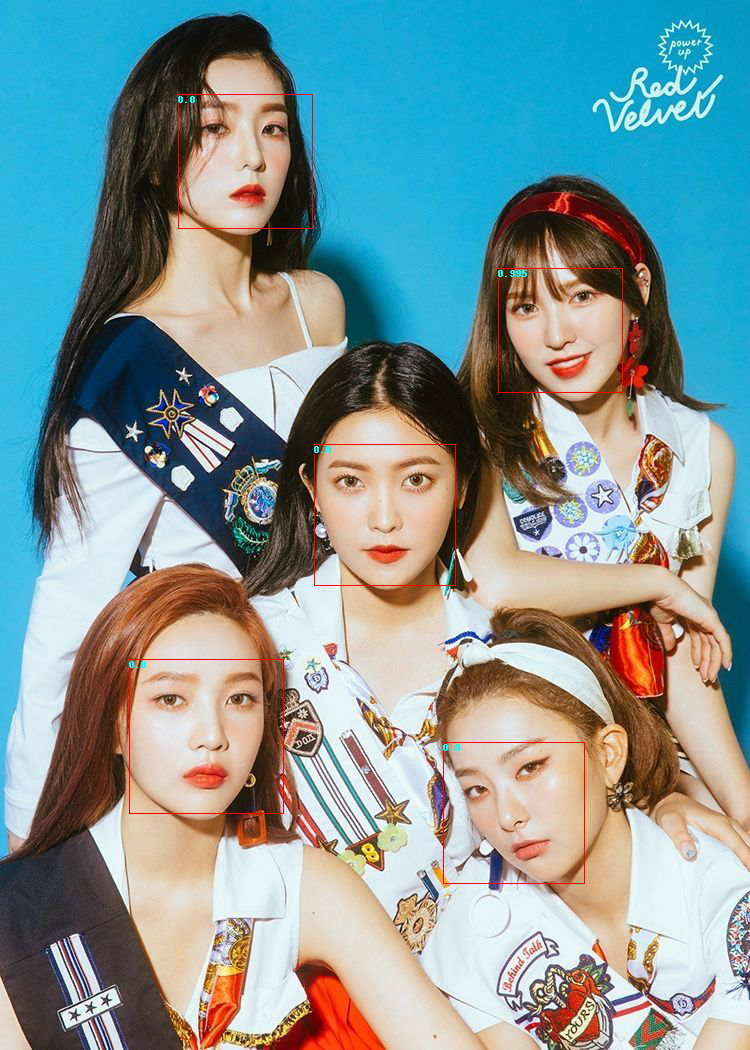

In [ ]:
DrawBox(faces)
image